In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# modules made for assignment
from modules import LoadData
from modules import ShowImage
from modules import label_split
from modules import kNearestClassifier
from modules import evaluation_kNearest
from modules import BinaryRespons
from modules import ValidationSplit
from modules import DevelopData
from modules import OptimalK

%matplotlib inline

# Loading Data

In [2]:
#LoadData.MNIST() #Data is cleaned to proper format

In [3]:
df_train_raw = pd.read_csv('MNIST_df_train.csv')
df_test_raw = pd.read_csv('MNIST_df_test.csv')

In [4]:
#ShowImage(df_train, 2)

In [5]:
#ShowImage(df_test, 3)

# 0/1 classification

In [6]:
v1, v2 = 0, 1
df_train = BinaryRespons(df_train_raw,v1,v2)
df_test = BinaryRespons(df_test_raw,v1,v2)

In [7]:
# For developing

df_train = DevelopData(df_train,100)
df_test = DevelopData(df_test,20)

In [8]:
df_train.labs = df_train.labs.astype('int64')
df_test.labs = df_test.labs.astype('int64')

df_train, df_validation = ValidationSplit(df_train, 0.8)

x, y = label_split(df_train)

In [9]:
k_list = [i*2 + 1 for i in range(17)]
pred_list_val = []

for k in k_list:
    df_validation['prediction'] = df_validation.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_validation.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list_val.append(evaluation_kNearest(df_validation))

In [10]:
pred_list_test = []

for k in k_list:
    df_test['prediction'] = df_test.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_test.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list_test.append(evaluation_kNearest(df_test))

In [11]:
k_optimal_val, error_k_optimal_val = OptimalK(k_list, pred_list_val)
k_optimal_test, error_k_optimal_test = OptimalK(k_list, pred_list_test)

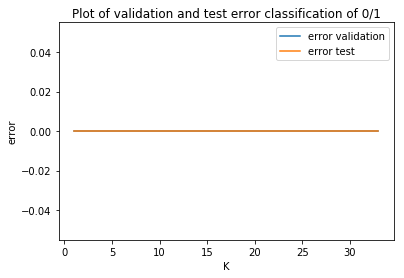

In [12]:
f, (ax1) = plt.subplots(1, 1)

ax1.plot(k_list, pred_list_val,label='error validation')
ax1.plot(k_list, pred_list_test,label='error test')

ax1.set_xlabel('K')
ax1.set_ylabel('error')

ax1.set_title('Plot of validation and test error classification of {}/{}'.format(v1, v2))

ax1.legend()
plt.savefig('figs/classification{}{}.png'.format(v1, v2))

In [13]:
print('optimal K - validation: ', k_optimal_val, 'error of optimal K - validation: ',error_k_optimal_val)
print('optimal K - test: ', k_optimal_test, 'error of optimal K - test: ',error_k_optimal_test)

optimal K - validation:  33 error of optimal K - validation:  0.0
optimal K - test:  33 error of optimal K - test:  0.0


# 0/8 classification

In [14]:
v1, v2 = 0, 8
df_train = BinaryRespons(df_train_raw,v1,v2)
df_test = BinaryRespons(df_test_raw,v1,v2)

In [15]:
# For developing

df_train = DevelopData(df_train,100)
df_test = DevelopData(df_test,20)

In [16]:
df_train.labs = df_train.labs.astype('int64')
df_test.labs = df_test.labs.astype('int64')

df_train, df_validation = ValidationSplit(df_train, 0.8)

x, y = label_split(df_train)

In [17]:
k_list = [i*2 + 1 for i in range(17)]
pred_list_val = []

for k in k_list:
    df_validation['prediction'] = df_validation.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_validation.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list_val.append(evaluation_kNearest(df_validation))

In [18]:
pred_list_test = []

for k in k_list:
    df_test['prediction'] = df_test.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_test.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list_test.append(evaluation_kNearest(df_test))

In [19]:
k_optimal_val, error_k_optimal_val = OptimalK(k_list, pred_list_val)
k_optimal_test, error_k_optimal_test = OptimalK(k_list, pred_list_test)

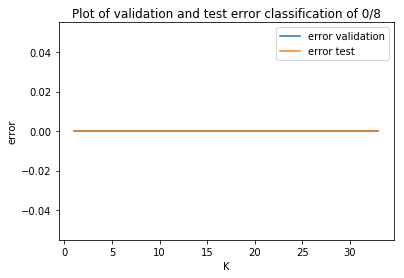

In [20]:
f, (ax1) = plt.subplots(1, 1)

ax1.plot(k_list, pred_list_val,label='error validation')
ax1.plot(k_list, pred_list_test,label='error test')
ax1.set_xlabel('K')
ax1.set_ylabel('error')

ax1.set_title('Plot of validation and test error classification of {}/{}'.format(v1, v2))

ax1.legend()
plt.savefig('figs/classification{}{}.png'.format(v1, v2))

In [21]:
print('optimal K - validation: ', k_optimal_val, 'error of optimal K - validation: ',error_k_optimal_val)
print('optimal K - test: ', k_optimal_test, 'error of optimal K - test: ',error_k_optimal_test)

optimal K - validation:  33 error of optimal K - validation:  0.0
optimal K - test:  33 error of optimal K - test:  0.0


# 5/6 classification

In [22]:
v1, v2 = 5, 6
df_train = BinaryRespons(df_train_raw,v1,v2)
df_test = BinaryRespons(df_test_raw,v1,v2)

In [23]:
# For developing

df_train = DevelopData(df_train,100)
df_test = DevelopData(df_test,20)

In [24]:
df_train.labs = df_train.labs.astype('int64')
df_test.labs = df_test.labs.astype('int64')

df_train, df_validation = ValidationSplit(df_train, 0.8)

x, y = label_split(df_train)

In [25]:
k_list = [i*2 + 1 for i in range(17)]
pred_list_val = []

for k in k_list:
    df_validation['prediction'] = df_validation.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_validation.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list_val.append(evaluation_kNearest(df_validation))

In [26]:
pred_list_test = []

for k in k_list:
    df_test['prediction'] = df_test.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_test.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list_test.append(evaluation_kNearest(df_test))

In [27]:
k_optimal_val, error_k_optimal_val = OptimalK(k_list, pred_list_val)
k_optimal_test, error_k_optimal_test = OptimalK(k_list, pred_list_test)

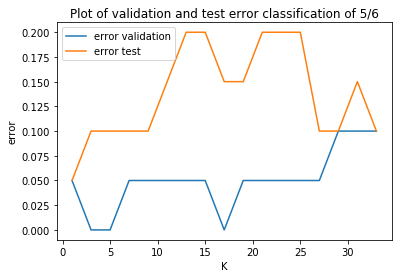

In [28]:
f, (ax1) = plt.subplots(1, 1)

ax1.plot(k_list, pred_list_val,label='error validation')
ax1.plot(k_list, pred_list_test,label='error test')

ax1.set_xlabel('K')
ax1.set_ylabel('error')

ax1.set_title('Plot of validation and test error classification of {}/{}'.format(v1, v2))

ax1.legend()
plt.savefig('figs/classification{}{}.png'.format(v1, v2))

In [29]:
print('optimal K - validation: ', k_optimal_val, 'error of optimal K - validation: ',error_k_optimal_val)
print('optimal K - test: ', k_optimal_test, 'error of optimal K - test: ',error_k_optimal_test)

optimal K - validation:  17 error of optimal K - validation:  0.0
optimal K - test:  1 error of optimal K - test:  0.05


# Linear Regression



In [117]:
danwood = LoadData.DanWood()
danwood['ones'] = 1 # adding vector for constant
danwood.head()
import seaborn as sns

In [124]:
x = np.array(danwood.drop('y', axis=1))
y = np.array(danwood['y'])
print(x.shape, y.shape)
x

(6, 2) (6,)


array([[ 1.309,  1.   ],
       [ 1.471,  1.   ],
       [ 1.49 ,  1.   ],
       [ 1.565,  1.   ],
       [ 1.611,  1.   ],
       [ 1.68 ,  1.   ]])

In [90]:
np.(x.T,x.T)

array([[ 1.713481,  1.925539,  1.95041 ,  2.048585,  2.108799,  2.19912 ],
       [ 1.925539,  2.163841,  2.19179 ,  2.302115,  2.369781,  2.47128 ],
       [ 1.95041 ,  2.19179 ,  2.2201  ,  2.33185 ,  2.40039 ,  2.5032  ],
       [ 2.048585,  2.302115,  2.33185 ,  2.449225,  2.521215,  2.6292  ],
       [ 2.108799,  2.369781,  2.40039 ,  2.521215,  2.595321,  2.70648 ],
       [ 2.19912 ,  2.47128 ,  2.5032  ,  2.6292  ,  2.70648 ,  2.8224  ]])

In [129]:
xx = np.dot(x.T,x)
xy = np.dot(x.T,y)
xx_inv = np.linalg.inv(xx)

ols = np.dot(xx_inv,xy)
ols

array([  9.48934569, -10.42696146])

In [139]:
linsp_length = abs((min(danwood.x) - max(danwood.x)))*0.1

linsp = np.linspace(min(danwood.x)-linsp_length,max(danwood.x)+linsp_length)
y_hat = ols[-1] + linsp*ols[0]
y_hat

array([ 1.64253732,  1.72875481,  1.81497229,  1.90118977,  1.98740726,
        2.07362474,  2.15984222,  2.24605971,  2.33227719,  2.41849467,
        2.50471216,  2.59092964,  2.67714713,  2.76336461,  2.84958209,
        2.93579958,  3.02201706,  3.10823454,  3.19445203,  3.28066951,
        3.366887  ,  3.45310448,  3.53932196,  3.62553945,  3.71175693,
        3.79797441,  3.8841919 ,  3.97040938,  4.05662687,  4.14284435,
        4.22906183,  4.31527932,  4.4014968 ,  4.48771428,  4.57393177,
        4.66014925,  4.74636674,  4.83258422,  4.9188017 ,  5.00501919,
        5.09123667,  5.17745415,  5.26367164,  5.34988912,  5.4361066 ,
        5.52232409,  5.60854157,  5.69475906,  5.78097654,  5.86719402])

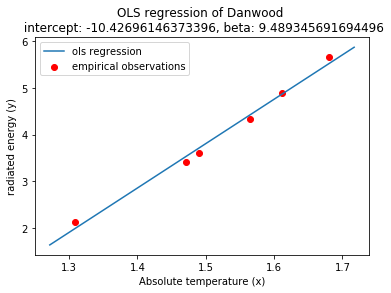

In [158]:
f, (ax1) = plt.subplots(1,1)

ax1.plot(linsp,y_hat, label = 'ols regression')
ax1.scatter(danwood.x,danwood.y, color='red', label = 'empirical observations')
ax1.set_xlabel('Absolute temperature (x)')
ax1.set_ylabel('radiated energy (y)')
ax1.set_title('OLS regression of Danwood \n intercept: {}, beta: {}'.format(ols[-1],ols[0]))
ax1.legend()


plt.savefig('figs/OLS.png')

'9.489'